# UV map
- nii to vtk
    - nii2mesh
- vtk to obj
    - https://imagetostl.com/convert/file/vtk/to/obj
- UV map is computed from UV-mapper
    - https://www.uvmapper.com/downloads.html

# TODO

- draw uv map with stat
- Rostral, caudal 구분
- 한 부분만 그리기 (앞쪽면만)

# Common Libraries

In [1]:
import trimesh
import os
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module")

from plot_3d import show_non_interactive_mesh, draw_uv_map
from sj_image_process import find_connected_components_faces

# Constants

In [3]:
mask_dir_path = "/mnt/ext1/seojin/HR/exp_blueprint_0324v4/fMRI_data/output/roi/mask"
lt_hippo_path = os.path.join(mask_dir_path, "lt_hippocampus_afterUVmap_planarZ.obj")
rt_hippo_path = os.path.join(mask_dir_path, "rt_hippocampus_afterUVmap_planarZ.obj")

# Load the OBJ file
mesh = trimesh.load(lt_hippo_path)
uv_coordinates = mesh.visual.uv
RASp_coord_vertices = mesh.vertices

# Find components
first_components = find_connected_components_faces(faces = mesh.faces)[0]
second_components = find_connected_components_faces(faces = mesh.faces)[1]
highlight_face_info = {
    "first" : {
        "data" : first_components,
        "color" : "red",
    },
    "second" : {
        "data" : second_components,
        "color" : "blue",
    },
}

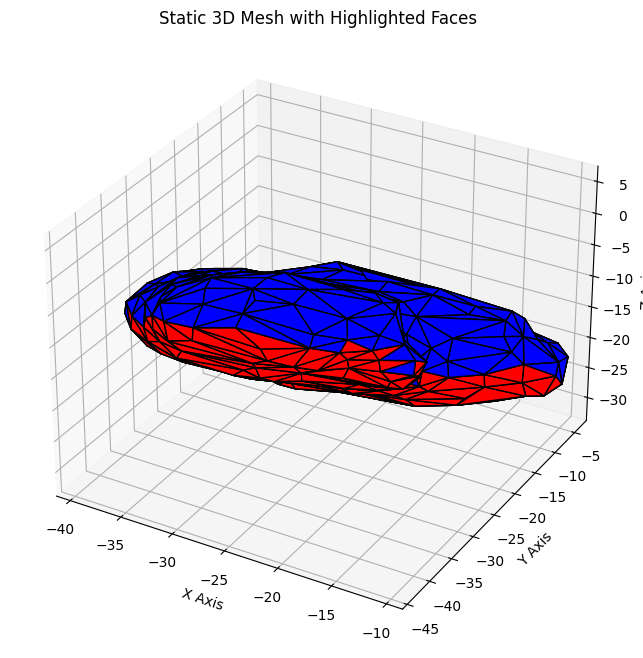

In [4]:
fig, ax = show_non_interactive_mesh(mesh.vertices, 
                                    mesh.faces, 
                                    highlight_face_info = highlight_face_info)
fig.set_figwidth(10)
fig.set_figheight(15)
ax.set_xlabel("R+")
ax.set_ylabel("A+")
ax.set_zlabel("S+")
fig.tight_layout()
plt.show()

# Find components

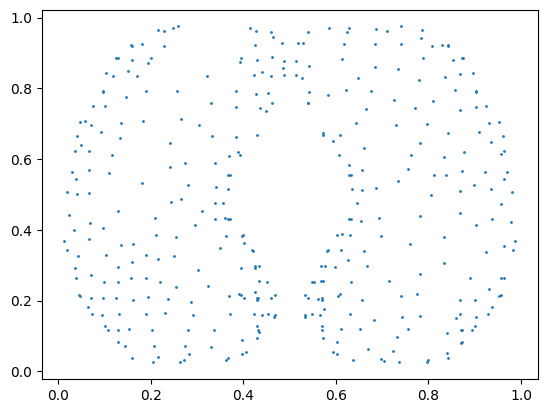

In [5]:
draw_uv_map(uv_coordinates, mesh.faces, highlight_face_info = {})

In [6]:
uv_coordinates.shape

(387, 2)

In [8]:
# 특정한 vector에 데이터를 projection해서 어떤 비율로 나눠보자 

In [10]:
def projection():
    pass